<a href="https://colab.research.google.com/github/manjushatr/CustomerBehaviorAnalysis/blob/main/customerbehavioranalysis__part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py

**Loading the data set**


In [ ]:
customer_supermarketdf = pd.read_csv('Customer_Behaviour_df.csv', sep=',', index_col=0, decimal=',')

In [ ]:
customer_supermarketdf.head(10)

,I,Iu,Imax,Entropy,BasketNum,SumExp,AvgExp
CustomerID,,,,,,,
12347.0,31,31,31,3.3096654861501777,1,711.79,711.79
12386.0,8,8,8,1.9658844730787666,1,258.9,258.9
12395.0,12,12,12,2.3660465385614353,1,346.1,346.1
12427.0,10,10,10,2.09849216045082,1,303.5,303.5
12429.0,20,20,20,2.7205664453764076,1,1281.5,1281.5
12431.0,14,14,14,2.545471509728219,1,358.25,358.25
12441.0,11,11,11,2.368010028808105,1,173.55,173.55
12471.0,48,47,47,3.358160601740352,2,2360.41,1180.205
12472.0,70,70,70,4.053346613533805,1,1631.3,1631.3


In [ ]:
customer_supermarketdf.isnull().sum()

I            0
Iu           0
Imax         0
Entropy      0
BasketNum    0
SumExp       0
AvgExp       0
dtype: int64

**Show features' importance as bar chart.**


In [ ]:
def feature_importance(dataframe, classifier):

    importances = classifier.feature_importances_
    features = dataframe.columns

    for feat, importance in zip(features, importances):
        print('{}, importance: {:.2f}'.format(feat, importance))

    py.figure()
    py.title("Feature importances")
    py.bar(x=features, height=importances, align="center")
    py.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
import statistics
from yellowbrick.classifier import classification_report as cr, confusion_matrix as cm

def report_scores(classifier, test_pred, feat=True, conf_mat=True, report=True):

    # feature importance
    if feat:
        feature_importance(customer_supermarketdf, classifier)
        print('\n')

    # scores
    scores = cross_validate(classifier, train_set, train_label, cv=3, return_train_score= True, scoring='accuracy')

    print('Fit time ', statistics.mean(scores['fit_time']))
    print('Score time ', statistics.mean(scores['score_time']))
    print('Train score ', statistics.mean(scores['train_score']))
    print('Test score ', statistics.mean(scores['test_score']))
    print('\n')

    classes = ['high', 'low', 'medium']

    # confusion matrix
    if conf_mat:
        cm(classifier, train_set, train_label, test_set, test_label,
        classes=classes)

        py.tight_layout()


    # classification report
    if report:
        print(classification_report(test_label, test_pred))
        cr(classifier, train_set, train_label, test_set, test_label,
           classes=classes, support=True)

        py.show()

**Defining classification labels**
After sorting the dataset by SumExp, we have splitted it in 3 equal parts.

* **First third** of customers is_low spending
* **Second third** of customers is medium spending
* **Last third** is high spending


In [ ]:
customer_supermarketdf.sort_values(by='SumExp', inplace=True)

l1 = len(customer_supermarketdf)
l2 = l1 // 3
l3 = l2*2
customer_supermarketdf['Label'] = "low"
customer_supermarketdf.loc[customer_supermarketdf.index[l2:l3], 'Label'] = "medium"
customer_supermarketdf.loc[customer_supermarketdf.index[l3:], 'Label'] = "high"

In [ ]:
customer_supermarketdf.tail()

,I,Iu,Imax,Entropy,BasketNum,SumExp,AvgExp,Label
CustomerID,,,,,,,,
15048.0,23,23,23,2.6552716097931954,1,98.7,98.7,high
13491.0,7,7,7,1.9355234866458373,1,98.9,98.9,high
17819.0,14,13,12,1.9256327515377016,2,980.12,490.06,high
15555.0,95,89,37,4.201275099410048,3,989.82,329.94,high
13418.0,33,32,22,3.30099581601381,3,992.3399999999999,330.78,high


In [ ]:
customer_supermarketdf.shape

(642, 8)

**We have dropped columns that won't be used in predictive analysis**



In [ ]:
customer_supermarketdf.drop(columns=['Iu', 'Imax', 'SumExp', 'AvgExp'], axis=1, inplace=True)

In [ ]:
customer_supermarketdf.tail()

,I,Entropy,BasketNum,Label
CustomerID,,,,
15048.0,23,2.6552716097931954,1,high
13491.0,7,1.9355234866458373,1,high
17819.0,14,1.9256327515377016,2,high
15555.0,95,4.201275099410048,3,high
13418.0,33,3.30099581601381,3,high


**Splitting Dataset**


In [ ]:
from sklearn.model_selection import train_test_split

label = customer_supermarketdf.pop("Label")
train_set, test_set, train_label, test_label = train_test_split(customer_supermarketdf, label, stratify=label, test_size=0.3, random_state=42)

train_label_cat = train_label.astype('category').cat.codes
test_label_cat = test_label.astype('category').cat.codes

print('Train set size: ', len(train_set))
print('Test set size: ', len(test_set))

Train set size:  449
Test set size:  193


**Naive Bayes classifier**

Fit time  0.0032352606455485025
Score time  0.0020530223846435547
Train score  0.4064697138610182
Test score  0.40311707680835196




/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


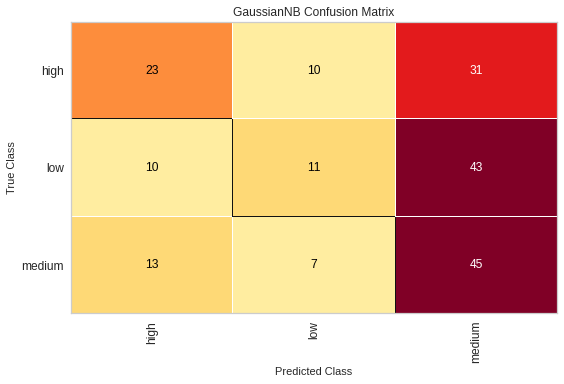

              precision    recall  f1-score   support

        high       0.50      0.36      0.42        64
         low       0.39      0.17      0.24        64
      medium       0.38      0.69      0.49        65

    accuracy                           0.41       193
   macro avg       0.42      0.41      0.38       193
weighted avg       0.42      0.41      0.38       193



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

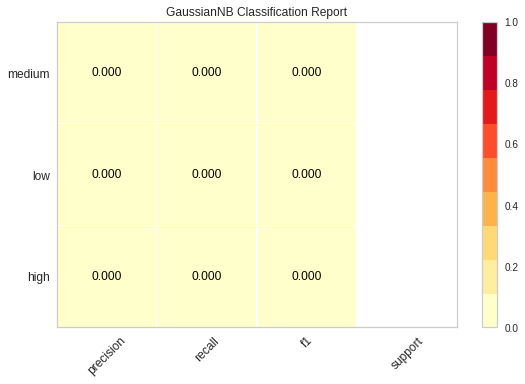

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(train_set, train_label)

test_pred_gnb = gnb.predict(test_set)

report_scores(gnb, test_pred_gnb, feat=False)


**Decision Tree Classifier**

I, importance: 0.30
Entropy, importance: 0.64
BasketNum, importance: 0.06


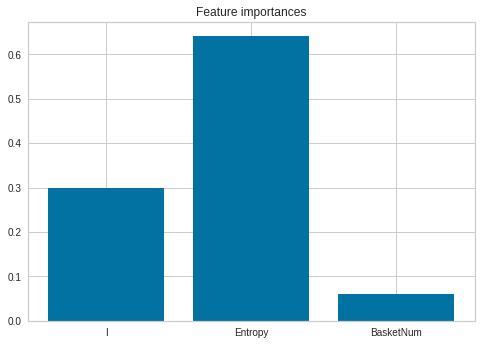



Fit time  0.0038283665974934897
Score time  0.0020500818888346353
Train score  0.975503530286139
Test score  0.4342281879194631




/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


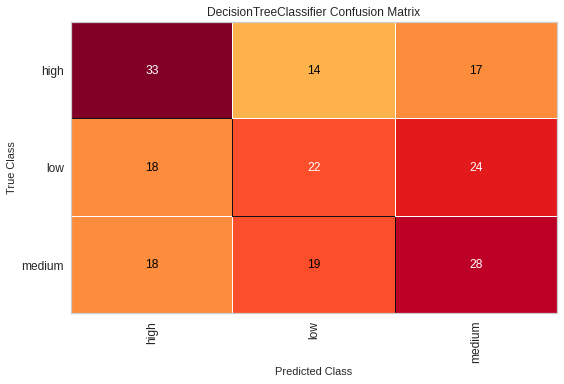

              precision    recall  f1-score   support

        high       0.48      0.52      0.50        64
         low       0.40      0.34      0.37        64
      medium       0.41      0.43      0.42        65

    accuracy                           0.43       193
   macro avg       0.43      0.43      0.43       193
weighted avg       0.43      0.43      0.43       193



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

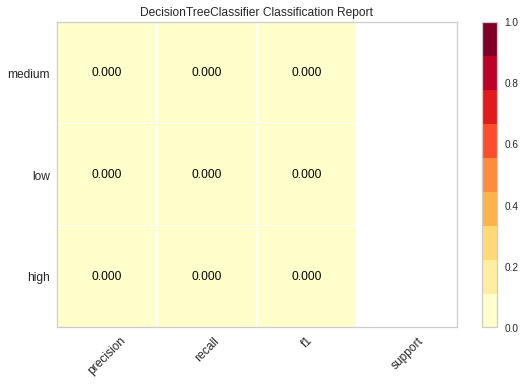

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
dt = DecisionTreeClassifier()
dt = dt.fit(train_set, train_label)

test_pred_dt = dt.predict(test_set)

report_scores(dt, test_pred_dt)


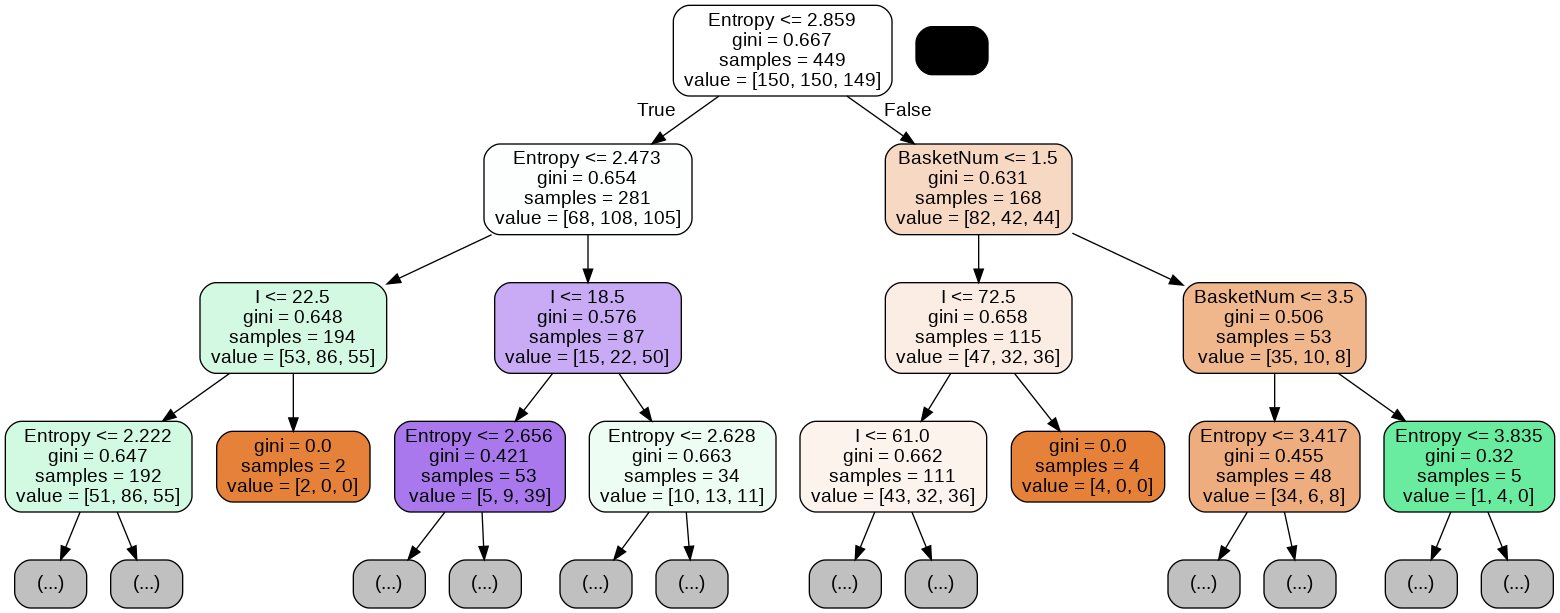

In [ ]:
# visualize the obtained decision tree
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(dt, out_file=None, max_depth=3,
                           feature_names=list(train_set.columns),
                           filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

**RandomForestClassifier**

I, importance: 0.32
Entropy, importance: 0.62
BasketNum, importance: 0.05


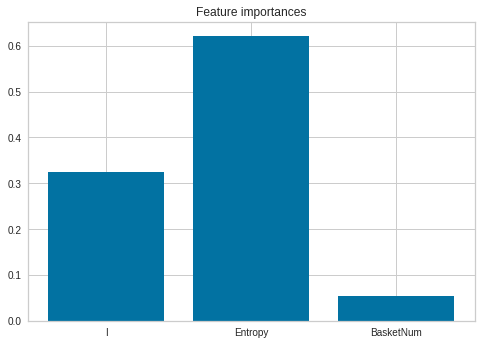



Fit time  0.17954707145690918
Score time  0.015901883443196613
Train score  0.975503530286139
Test score  0.4721551081282625




/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


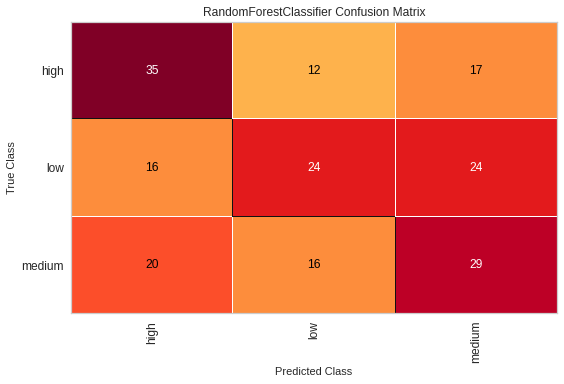

              precision    recall  f1-score   support

        high       0.49      0.55      0.52        64
         low       0.46      0.38      0.41        64
      medium       0.41      0.45      0.43        65

    accuracy                           0.46       193
   macro avg       0.46      0.46      0.45       193
weighted avg       0.46      0.46      0.45       193



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

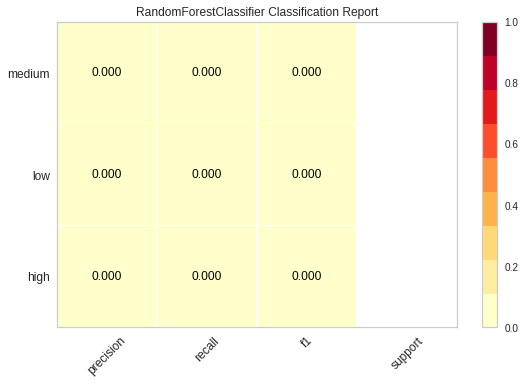

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf = rf.fit(train_set, train_label)

test_pred_rf = rf.predict(test_set)

report_scores(rf, test_pred_rf)


**KNN Classifier**

Fit time  0.0033742586771647134
Score time  0.007452249526977539
Train score  0.5155964325529543
Test score  0.4388217747949292




/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


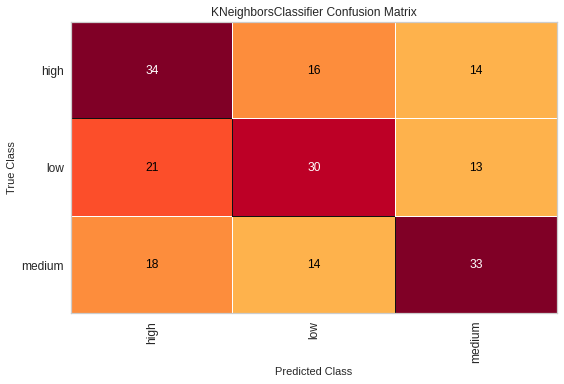

              precision    recall  f1-score   support

        high       0.47      0.53      0.50        64
         low       0.50      0.47      0.48        64
      medium       0.55      0.51      0.53        65

    accuracy                           0.50       193
   macro avg       0.51      0.50      0.50       193
weighted avg       0.51      0.50      0.50       193



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, l

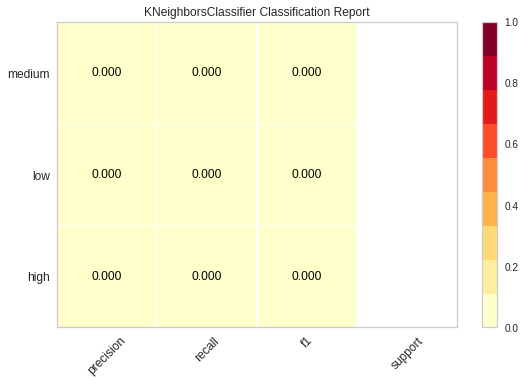

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=12, algorithm='auto')

knn = knn.fit(train_set, train_label)

test_pred_knn = knn.predict(test_set)

report_scores(knn, test_pred_knn, feat=False)


**SVM Classifier**

Fit time  0.00868527094523112
Score time  0.004788637161254883
Train score  0.44433296172426606
Test score  0.44102908277404923




/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


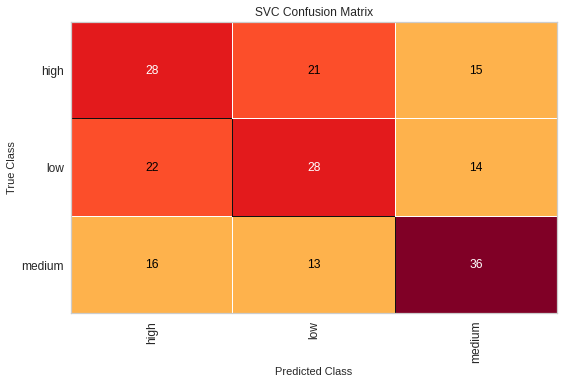

              precision    recall  f1-score   support

        high       0.42      0.44      0.43        64
         low       0.45      0.44      0.44        64
      medium       0.55      0.55      0.55        65

    accuracy                           0.48       193
   macro avg       0.48      0.48      0.48       193
weighted avg       0.48      0.48      0.48       193



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/

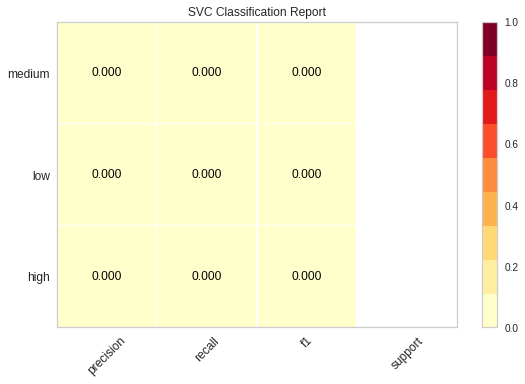

In [ ]:
from sklearn.svm import SVC

svm = SVC()

svm = svm.fit(train_set, train_label)

test_pred_svm = svm.predict(test_set)

report_scores(svm, test_pred_svm, feat=False)
